goal: import sequences, analyze them, and plot the results
**terminal commands** 
    1. muscle -in seqs.fa -out seqs.aligned.fa
what this line of code did was take  seqs.fa file, which from our knowledge was a bunch of random sequences of varried length, it then outputtied another fasta file. However, the difference is that in the outputted file the sequences are now the same length and were alligned to one another in hopes to find a commonality.
    2. fasttree -nt < seqs.alligned.fa > tree.nwk
what this line of code did was take the newly alligned fasta file and combine all of the sequences that share a common ancestry, it then exported it into a newick file


In [218]:
#draw tree graph 
#adding _ascii makes the tree bigger 
from Bio import Phylo
tree = Phylo.read('tree.nwk', 'newick')
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

In [308]:
from Bio import SeqIO
from Bio import AlignIO
dictionary= SeqIO.to_dict(SeqIO.parse("seqs.aligned.fa", "fasta"))
clusters= { 1 : [dictionary['hu.31'], dictionary['hu.32'], dictionary['hu.14'], 
               dictionary['hu.44'], dictionary['hu.46'], dictionary['hu.43'], dictionary['hu.48'], dictionary['rh.43']],
          2: [dictionary['rh.64'], dictionary['rh.57'], dictionary['rh.51'], dictionary['rh.49'], 
              dictionary['rh.53'], dictionary['rh.50'] , dictionary['rh.52'] , dictionary['hu.39']],
          3: [dictionary['cy.2'], dictionary['rh.54'], dictionary['rh.55'], dictionary['rh.48'], 
              dictionary['rh.62'], dictionary['cy.3'], dictionary['cy.6'], dictionary['cy.4'], dictionary['cy.5'], 
              dictionary['rh.13'], dictionary['rh.35'], dictionary['rh.36'], dictionary['rh.37']],
          4: [dictionary['rh.10'], dictionary['bb.1'], dictionary['bb.2'], dictionary['hu.17'], dictionary['hu.6'],
              dictionary['rh.2'], dictionary['rh.40'], dictionary['hu.67'], dictionary['hu.37'], dictionary['hu.40'], 
              dictionary['hu.66'], dictionary['hu.41'], dictionary['rh.38'], dictionary['hu.42']],
          5: [dictionary['pi.1'], dictionary['pi.2'],dictionary['pi.3'],dictionary['rh.61'], dictionary['rh.58']] }


In [309]:
from Bio.SeqUtils import GC


GC_1= []
for i in range(len(clusters[1][0].seq)):
    sum = 0
    for x in clusters[1]:
        sum = sum + (GC(x.seq[i])/ 100)
    avg = sum /len(clusters[1])
    GC_1.append(avg)
    
GC_2= []
for i in range(len(clusters[2][0].seq)):
    sum = 0
    for x in clusters[2]:
        sum= sum + (GC(x.seq[i])/100)
    avg = sum/len(clusters[2])
    GC_2.append(avg)

GC_3= []
for i in range(len(clusters[3][0].seq)):
    sum = 0
    for x in clusters[3]:
        sum= sum + (GC(x.seq[i])/100)
    avg = sum/len(clusters[3])
    GC_3.append(avg)
    
GC_4= []
for i in range(len(clusters[4][0].seq)):
    sum = 0
    for x in clusters[4]:
        sum= sum + (GC(x.seq[i])/100)
    avg = sum/len(clusters[4])
    GC_4.append(avg)
    
GC_5= []
for i in range(len(clusters[5][0].seq)):
    sum = 0
    for x in clusters[5]:
        sum= sum + (GC(x.seq[i])/100)
    avg = sum/len(clusters[5])
    GC_5.append(avg)


In [235]:
import numpy as np

GC_1a= np.array(GC_1)
GC_2a= np.array(GC_2)
GC_3a= np.array(GC_3)
GC_4a= np.array(GC_4)
GC_5a= np.array(GC_5)

In [236]:
AT_1= 1- GC_1a
AT_2=1- GC_2a
AT_3= 1- GC_3a
AT_4= 1- GC_4a
AT_5= 1- GC_5a

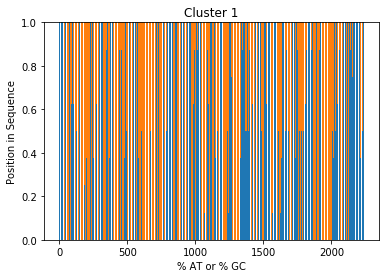

In [240]:
import matplotlib.pyplot as plt 
import numpy as np


plt.bar(np.arange(len(clusters[1][0].seq)) ,GC_1)
plt.bar(np.arange(len(clusters[1][0].seq)), AT_1, bottom= GC_1)
plt.xlabel('% AT or % GC')
plt.ylabel('Position in Sequence')
plt.title('Cluster 1')
plt.show()

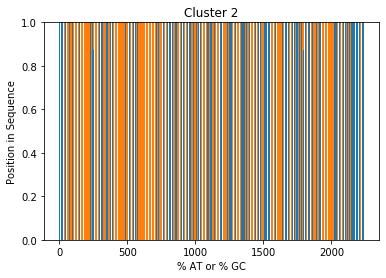

In [242]:
plt.bar(np.arange(len(clusters[1][0].seq)) ,GC_2)
plt.bar(np.arange(len(clusters[1][0].seq)), AT_2, bottom= GC_2)
plt.xlabel('% AT or % GC')
plt.ylabel('Position in Sequence')
plt.title('Cluster 2')
plt.show()

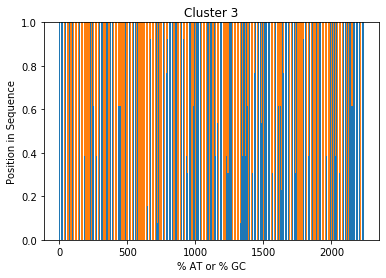

In [243]:
plt.bar(np.arange(len(clusters[1][0].seq)) ,GC_3)
plt.bar(np.arange(len(clusters[1][0].seq)), AT_3, bottom= GC_3)
plt.xlabel('% AT or % GC')
plt.ylabel('Position in Sequence')
plt.title('Cluster 3')
plt.show()

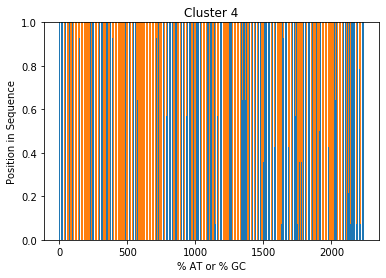

In [244]:
plt.bar(np.arange(len(clusters[1][0].seq)) ,GC_4)
plt.bar(np.arange(len(clusters[1][0].seq)), AT_4, bottom= GC_4)
plt.xlabel('% AT or % GC')
plt.ylabel('Position in Sequence')
plt.title('Cluster 4')
plt.show()

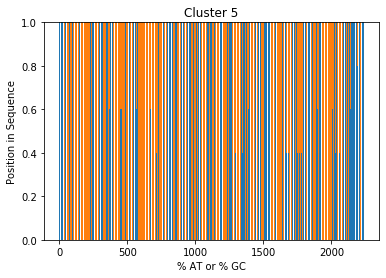

In [245]:
plt.bar(np.arange(len(clusters[1][0].seq)) ,GC_5)
plt.bar(np.arange(len(clusters[1][0].seq)), AT_5, bottom= GC_5)
plt.xlabel('% AT or % GC')
plt.ylabel('Position in Sequence')
plt.title('Cluster 5')
plt.show()

In [269]:
undictionary= SeqIO.to_dict(SeqIO.parse("seqs.fa", "fasta"))
unclusters= { 1: [undictionary['hu.31'], undictionary['hu.32'], undictionary['hu.14'], 
               undictionary['hu.44'], undictionary['hu.46'], undictionary['hu.43'], undictionary['hu.48'], undictionary['rh.43']],
          2: [undictionary['rh.64'], undictionary['rh.57'], undictionary['rh.51'], undictionary['rh.49'], 
              undictionary['rh.53'], undictionary['rh.50'] , undictionary['rh.52'] , undictionary['hu.39']],
          3: [undictionary['cy.2'], undictionary['rh.54'], undictionary['rh.55'], undictionary['rh.48'], 
              undictionary['rh.62'], undictionary['cy.3'], undictionary['cy.6'], undictionary['cy.4'], undictionary['cy.5'], 
              undictionary['rh.13'], undictionary['rh.35'], undictionary['rh.36'], undictionary['rh.37']],
          4: [undictionary['rh.10'], undictionary['bb.1'], undictionary['bb.2'], undictionary['hu.17'], undictionary['hu.6'],
              undictionary['rh.2'], undictionary['rh.40'], undictionary['hu.67'], undictionary['hu.37'], undictionary['hu.40'], 
              undictionary['hu.66'], undictionary['hu.41'], undictionary['rh.38'], undictionary['hu.42']],
          5: [undictionary['pi.1'], undictionary['pi.2'],undictionary['pi.3'],undictionary['rh.61'], undictionary['rh.58']] }


In [291]:
CL1= []

for x in unclusters[1]:
    CL1.append(len(x.seq))

In [292]:
CL2= []

for x in unclusters[2]:
    CL2.append(len(x.seq))

In [293]:
CL3= []

for x in unclusters[3]:
    CL3.append(len(x.seq))

In [294]:
CL4= []

for x in unclusters[4]:
    CL4.append(len(x.seq))

In [295]:
CL5= []

for x in unclusters[5]:
    CL5.append(len(x.seq))

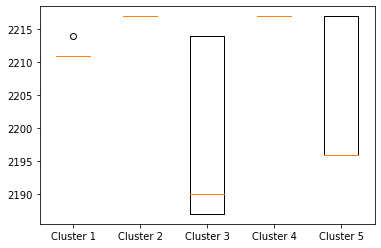

In [300]:
plt.boxplot([CL1, CL2, CL3, CL4, CL5], labels= ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()